# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Abolfazl Yarian
2.   Student Number: 400205641


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [31]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [32]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

dataset = dataset.sample(frac=1).reset_index(drop=True)  # shuffling

x_train = np.array(dataset['X'].iloc[:int(dataset.shape[0] * 0.8)]).reshape(-1,1)
y_train = np.array(dataset['Y'].iloc[:int(dataset.shape[0] * 0.8)]).reshape(-1,1)

x_test = np.array(dataset['X'].iloc[int(dataset.shape[0] * 0.8):]).reshape(-1,1)
y_test = np.array(dataset['Y'].iloc[int(dataset.shape[0] * 0.8):]).reshape(-1,1)


### Part2: 
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [33]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

x = np.hstack([x_train, np.ones(x_train.shape)])
m = np.dot((np.dot(np.linalg.inv(np.dot(x.T,x)),x.T)),y_train)


In [34]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train , predicted_train_y)
test_error = mean_squared_error(y_test , predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3273105467320548
MSE test error: 0.34725092769012994


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

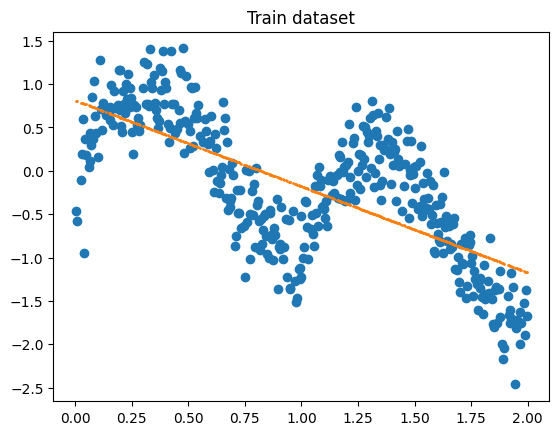

In [35]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

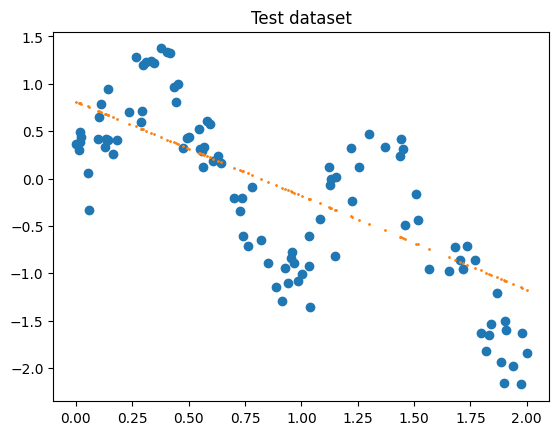

In [36]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
#### 1 ) Were the reported accuracies acceptable?
- The test and training errors are the same, but they are not sufficiently lower, and so the accuracies are not acceptable. Also, we can say that the regressor has a high bias and variance and we must add more features to improve prediction. In this interpretation of plots, you see that the regressor doesn't follow the data very well because the data are not linear and the regressor is linear. We must use a regressor with a high degree ( more than 3 ) to predict this model.

#### 2 )What about the line you drew in the last part?
- As I said, the line doesn't represent the data because the data is not linear and the regressor is linear. We must use a regressor with a high degree ( more than 3 ) to predict this model.

#### 3 )Was it appropriate for the dataset? Explain what are the main problems here.
- No, because it is not linear and we must use a non-linear regressor (e.g., a polynomial with higher degrees) to predict. As such, we use some methods to improve the linear regression, such as piece wise line regression or locally weighted regression.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

- Yes. In this method, we give appropriate weight to the data close to the test data, the closer the data is to the test data, the more weight it is given. Essentially, we apply a linear regression locally, then combine several lines for the output.so, this method has result better than simple linear regression

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [37]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.float64(np.dot(xi-the_query_point, (xi-the_query_point).T))/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [38]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    inv = np.linalg.inv((X.T).dot(W).dot(X))
    theta = inv.dot(X.T).dot(W).dot(train_Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [39]:
hyperparameter=.06

In [40]:
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error(y_test , np.array(predicted_test).reshape(-1,1))
print(f"MSE test error: {error}")

/home/abolfazl/.local/lib/python3.10/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.10143250036021803


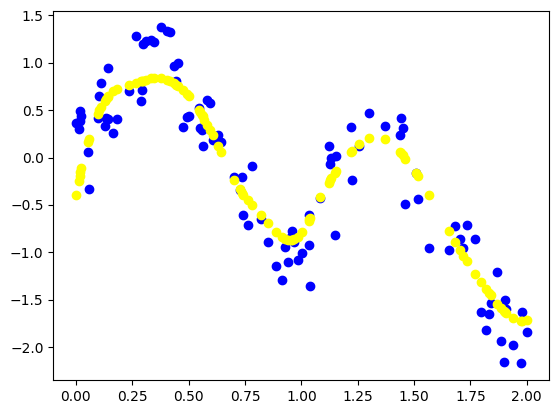

In [41]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

- The improvement in the result is evident. The reason is fully explained in part 5. Note that the choice of hyperparameter plays an important role in training the model. Here, I have considered the hyperparameter as `0.06`.
In this way, reducing this value increases the degree of locality so that it can better follow the graph's changes, while increasing it acts like a simple linear regression. In addition, the diagonal of the weight matrix is almost one for the closest samples, and almost zero for distant samples.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

- Yes, the KNN model also works locally, similar to the previous model, in that we consider K based on the closest distance to training points . Also, the number of neighbors is considered as a hyperparameter. If we take K as the smallest number(=1),which means every test point (the highest complexity), and if it is infinite, it means the average of our data (the lowest complexity). Therefore, by adjusting this number, we change the complexity of the model.

### Part10:
Implementing the `KNN model`.

In [42]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        temp = np.empty(self.X.shape)

        for i in range(self.X.shape[0]):
            temp[i] = self.distance(x,self.X[i])

        indices = np.argsort(temp,axis=0)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [43]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test , predicted_y)
    return error, predicted_y

In [44]:
k = 21
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.08566602252457091


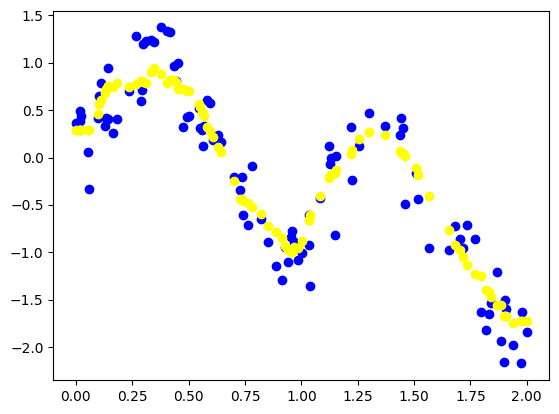

In [45]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

- The Best `K` in this problem is `K=21`.
As you can see, the KNN model has shown an acceptable performance and has an error close to the previous method.
